In [116]:
# Necessary packages are imported.

# Importing pandas library to work with the datasets.
import json
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
import plotly.io as pio
import geopandas as gpd
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.ticker as mtick
from matplotlib.ticker import MaxNLocator
pio.renderers.default = "vscode"
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer

In [89]:
# read by default 1st sheet of an excel file
dataframe2 = pd.read_excel('Abstractform_All_RiskFactors.xlsx')
 
print(dataframe2)

                           GlobalRecordId DateofBirth   Age     Gender  \
0    20c466aa-7b12-408e-9510-2deecd39544d         NaN   NaN        NaN   
1    3d5a3f8f-a42a-42a1-89cc-580585e46ce5         NaN   NaN        NaN   
2    4fd36846-c669-4cf6-b11d-43a1f39bdabd   01-Jan-38  69.0    1- Male   
3    606742fc-d78c-4768-b561-ed4da010d19a         NaN   NaN        NaN   
4    65cd177e-1812-446b-b7ff-1d557ca9efea         NaN   NaN        NaN   
5    d2c992a7-f4e5-49e3-9e71-d4d34e60ad2b   01-Jan-62  45.0  2- Female   
6    e7f33262-7afd-42f5-ac1d-ee2085b66176         NaN   NaN        NaN   
7    f59cb48d-ba20-4ac1-b805-6fd79c80d4b2         NaN  35.0        NaN   
8    4b09dee6-ab27-460b-beb5-9710e0ced14f   01-Jan-54  53.0  2- Female   
9    a954580a-247e-4f06-8948-3345f33f449f   01-Jan-42  65.0    1- Male   
10   bc2ca7d0-7813-4758-9516-afe64fcc7865   01-Jan-56  51.0    1- Male   
11   c3a1973a-a91c-4c1a-90d8-6dc2b8f7ff64   01-Jan-75  32.0  2- Female   
12   9b1d3a7e-71bd-490d-a757-925914eaf

In [65]:
# Code for converting excel file into csv file format.
#dataframe2.to_csv ("MedicalData2.csv",  index = None,  header=True) 
    
# read csv file and convert into a dataframe object 
MedicalData2 = pd.DataFrame(pd.read_csv("MedicalData2.csv", index_col=0)) 

MedicalData2 = MedicalData2.reset_index()
  
# show the dataframe 
MedicalData2.head(10)

,GlobalRecordId,DateofBirth,Age,Gender,Nationality,Address,MaritalStatus,Occupation,PhysicalActivity,AbdominalFatness,...,RectalBleeding,weightloss,Aneamia,Changeofbowelhabit,Appititeloss,Fullness,AbdominalPain,Abdominaladistention,GeneralizedFatigability,N9UnKnowncomplains
0,20c466aa-7b12-408e-9510-2deecd39544d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,3d5a3f8f-a42a-42a1-89cc-580585e46ce5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
2,4fd36846-c669-4cf6-b11d-43a1f39bdabd,01-Jan-38,69.0,1- Male,1- Libyan,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
3,606742fc-d78c-4768-b561-ed4da010d19a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
4,65cd177e-1812-446b-b7ff-1d557ca9efea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
5,d2c992a7-f4e5-49e3-9e71-d4d34e60ad2b,01-Jan-62,45.0,2- Female,1- Libyan,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
6,e7f33262-7afd-42f5-ac1d-ee2085b66176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
7,f59cb48d-ba20-4ac1-b805-6fd79c80d4b2,NaN,35.0,NaN,NaN,NaN,2- Married,5- House Wife,9- UnKnown,False,...,True,False,False,True,False,False,True,False,False,False
8,4b09dee6-ab27-460b-beb5-9710e0ced14f,01-Jan-54,53.0,2- Female,1- Libyan,Agelat,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
9,a954580a-247e-4f06-8948-3345f33f449f,01-Jan-42,65.0,1- Male,1- Libyan,Agelat,2- Married,3- Employee,1- physically active,False,...,True,False,False,True,False,True,False,False,False,False


In [8]:
# Show description of MedicalData2 dataframe.

MedicalData2.describe()

,Age,Durationofsmoking
count,209.000000,13.000000
mean,55.803828,23.846154
std,13.814178,13.963322
min,23.000000,6.000000
25%,45.000000,12.000000
50%,56.000000,20.000000
75%,65.000000,40.000000
max,89.000000,43.000000


In [72]:
# Show the data types of all the columns in the MedicalData2 dataframe.

MedicalData2.dtypes

GlobalRecordId              object
DateofBirth                 object
Age                        float64
Gender                      object
Nationality                 object
Address                     object
MaritalStatus               object
Occupation                  object
PhysicalActivity            object
AbdominalFatness              bool
Smoking                     object
Durationofsmoking          float64
Unit                        object
N9UnKnownlifestyle            bool
AlcoholDrinks               object
DioxinExposure              object
Yes                           bool
Nofamilyhistory               bool
Colorectalcancer              bool
RectalBleeding                bool
weightloss                    bool
Aneamia                       bool
Changeofbowelhabit            bool
Appititeloss                  bool
Fullness                      bool
AbdominalPain                 bool
Abdominaladistention          bool
GeneralizedFatigability       bool
N9UnKnowncomplains  

In [28]:
# All columns in MedicalData2 dataframe.

MedicalData2.keys()

Index(['GlobalRecordId', 'DateofBirth', 'Age', 'Gender', 'Nationality',
       'Address', 'MaritalStatus', 'Occupation', 'PhysicalActivity',
       'AbdominalFatness', 'Smoking', 'Durationofsmoking', 'Unit',
       'N9UnKnownlifestyle', 'AlcoholDrinks', 'DioxinExposure', 'Yes',
       'Nofamilyhistory', 'Colorectalcancer', 'RectalBleeding', 'weightloss',
       'Aneamia', 'Changeofbowelhabit', 'Appititeloss', 'Fullness',
       'AbdominalPain', 'Abdominaladistention', 'GeneralizedFatigability',
       'N9UnKnowncomplains', 'native.country'],
      dtype='object')

<h2> Colorectal cancer signs & symptoms: <h2>

In [99]:
print(MedicalData2['Colorectalcancer'].value_counts())
MedicalData2['Colorectalcancer'].isna().sum()

Colorectalcancer
False    208
True      10
Name: count, dtype: int64


0

In [117]:
Signs = MedicalData2[['Colorectalcancer', 'RectalBleeding', 'weightloss', 'Aneamia','Changeofbowelhabit', 'Appititeloss', 'Fullness', 'AbdominalPain',
       'Abdominaladistention', 'GeneralizedFatigability']]

In [118]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['Colorectalcancer', 'RectalBleeding', 'weightloss', 'Aneamia',
       'Changeofbowelhabit', 'Appititeloss', 'Fullness', 'AbdominalPain',
       'Abdominaladistention', 'GeneralizedFatigability']),
    remainder='passthrough')

In [119]:
transform_signs = column_trans.fit_transform(Signs)

In [121]:
column_trans.get_feature_names_out(input_features=None)

array(['onehotencoder__Colorectalcancer_False',
       'onehotencoder__Colorectalcancer_True',
       'onehotencoder__RectalBleeding_False',
       'onehotencoder__RectalBleeding_True',
       'onehotencoder__weightloss_False',
       'onehotencoder__weightloss_True', 'onehotencoder__Aneamia_False',
       'onehotencoder__Aneamia_True',
       'onehotencoder__Changeofbowelhabit_False',
       'onehotencoder__Changeofbowelhabit_True',
       'onehotencoder__Appititeloss_False',
       'onehotencoder__Appititeloss_True',
       'onehotencoder__Fullness_False', 'onehotencoder__Fullness_True',
       'onehotencoder__AbdominalPain_False',
       'onehotencoder__AbdominalPain_True',
       'onehotencoder__Abdominaladistention_False',
       'onehotencoder__Abdominaladistention_True',
       'onehotencoder__GeneralizedFatigability_False',
       'onehotencoder__GeneralizedFatigability_True'], dtype=object)

In [122]:
TS = pd.DataFrame(transform_signs)
TS = TS.rename(columns={ 0:'Colorectalcancer_False', 1: 'Colorectalcancer_True' , 2: 'RectalBleeding_False', 3: 'RectalBleeding_True', 4: 'weightloss_False' , 5: 'weightloss_True', 6: 'Aneamia_False', 7: 'Aneamia_True', 8: 'Changeofbowelhabit_False', 9: 'Changeofbowelhabit_True', 10:'Appititeloss_False' , 11: 'Appititeloss_True', 12: 'Fullness_False', 13: 'Fullness_True', 14:'AbdominalPain_False' ,15: 'AbdominalPain_True', 16: 'Abdominaladistention_False' , 17: 'Abdominaladistention_True', 18: 'GeneralizedFatigability_False', 19:'GeneralizedFatigability_True' })
TS.head()

,Colorectalcancer_False,Colorectalcancer_True,RectalBleeding_False,RectalBleeding_True,weightloss_False,weightloss_True,Aneamia_False,Aneamia_True,Changeofbowelhabit_False,Changeofbowelhabit_True,Appititeloss_False,Appititeloss_True,Fullness_False,Fullness_True,AbdominalPain_False,AbdominalPain_True,Abdominaladistention_False,Abdominaladistention_True,GeneralizedFatigability_False,GeneralizedFatigability_True
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


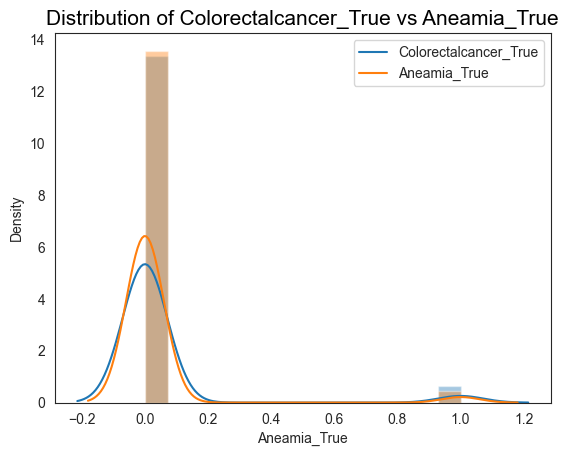

In [176]:
plt.ylabel("Density")
plt.xlabel("Values")
plt.title('Distribution of Colorectalcancer_True vs Aneamia_True', color = 'black',fontsize=15)

sns.distplot(TS['Colorectalcancer_True'])
sns.distplot(TS['Aneamia_True'])

plt.legend( loc='upper right', labels=['Colorectalcancer_True', 'Aneamia_True'])

<Axes: ylabel='Density'>

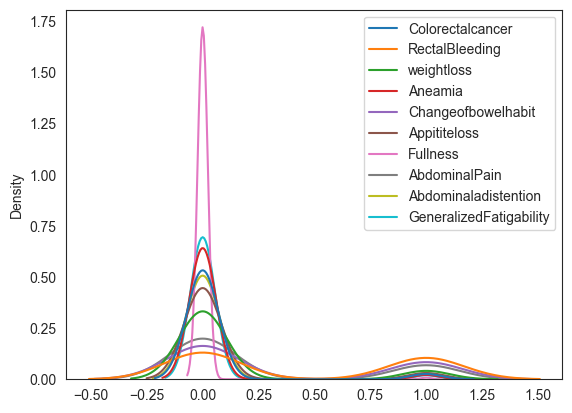

In [162]:
sns.kdeplot(Signs)

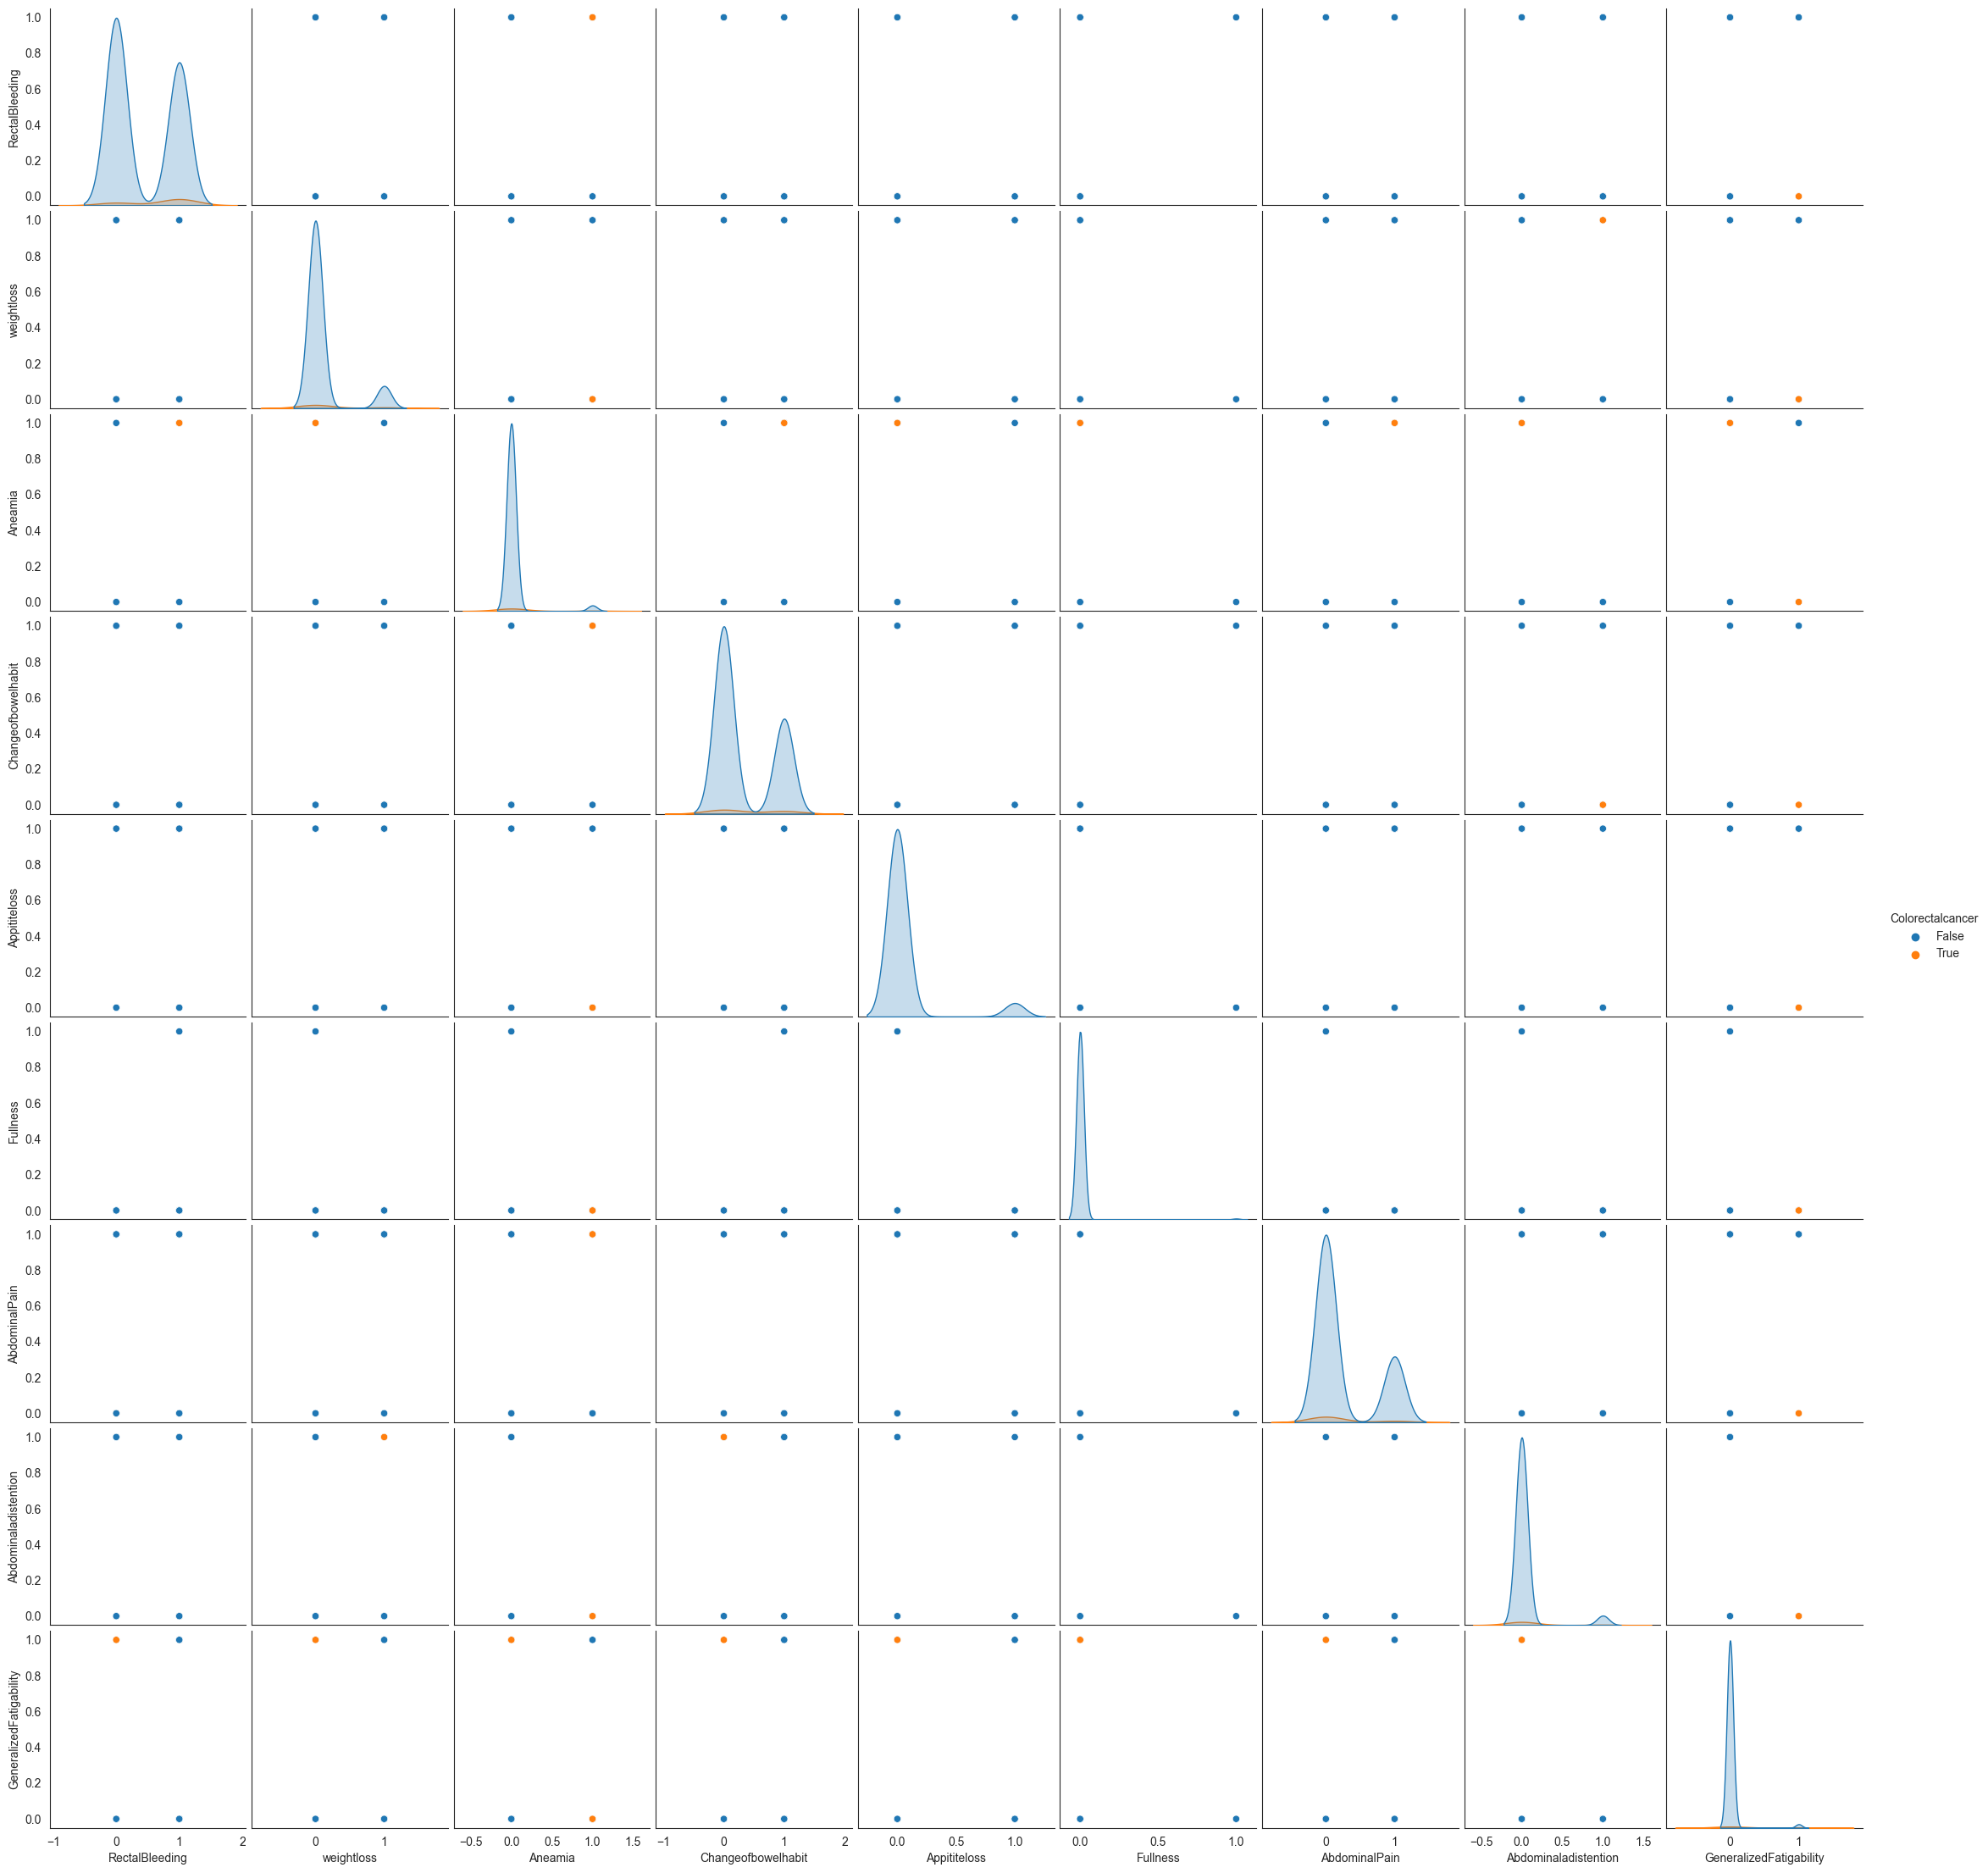

In [168]:
sns.pairplot(Signs, hue='Colorectalcancer', size=2.5);

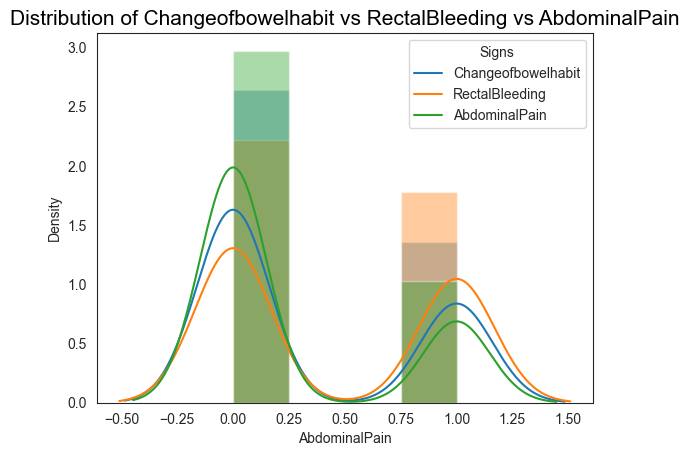

In [174]:
plt.ylabel("Density")
plt.xlabel("Values")
plt.title('Distribution of Changeofbowelhabit vs RectalBleeding vs AbdominalPain', color = 'black',fontsize=15)

sns.distplot(Signs['Changeofbowelhabit'])
sns.distplot(Signs['RectalBleeding'])
sns.distplot(Signs['AbdominalPain'])

plt.legend(title='Signs', loc='upper right', labels=['Changeofbowelhabit', 'RectalBleeding', 'AbdominalPain'])

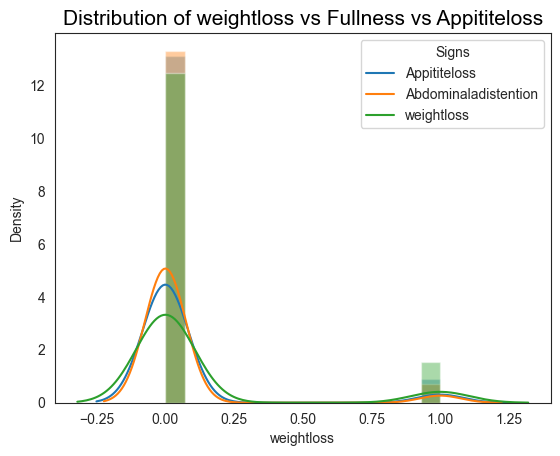

In [173]:
plt.ylabel("Density")
plt.xlabel("Values")
plt.title('Distribution of weightloss vs Fullness vs Appititeloss', color = 'black',fontsize=15)

sns.distplot(Signs['Appititeloss'])
sns.distplot(Signs['Abdominaladistention'])
sns.distplot(Signs['weightloss'])

plt.legend(title='Signs', loc='upper right', labels=['Appititeloss', 'Abdominaladistention', 'weightloss'])

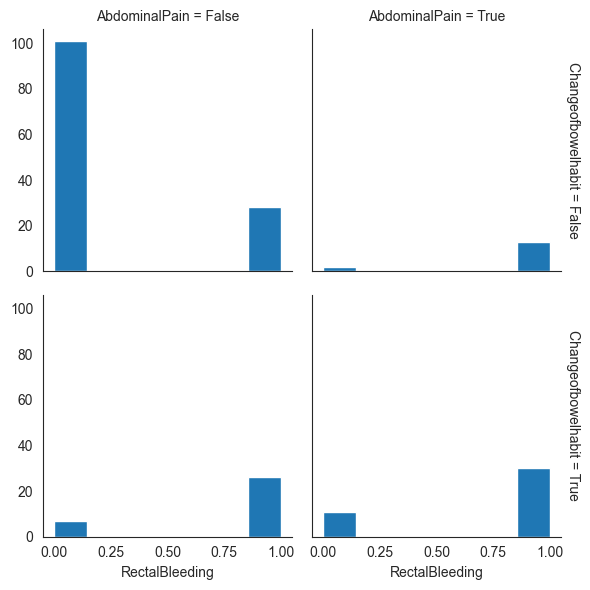

In [166]:
grid = sns.FacetGrid(Signs, row="Changeofbowelhabit", col="AbdominalPain", margin_titles=True)
grid.map(plt.hist, "RectalBleeding", bins=np.linspace(0, 1, 8))

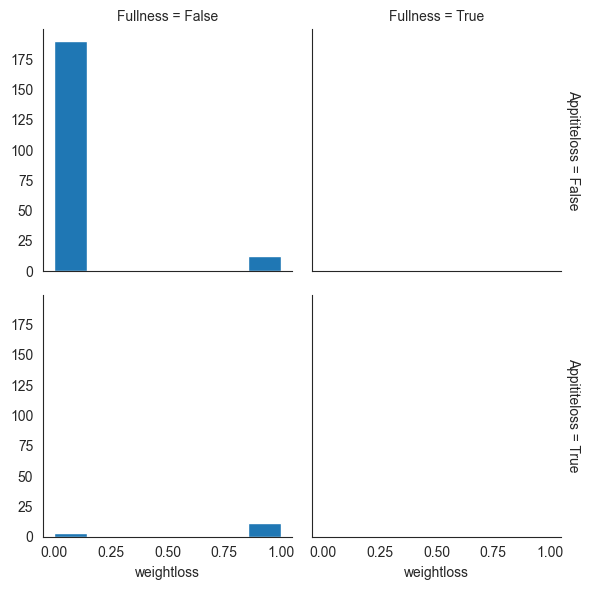

In [161]:
grid = sns.FacetGrid(Signs, row="Appititeloss", col="Fullness", margin_titles=True)
grid.map(plt.hist, "weightloss", bins=np.linspace(0, 1, 8))

<Axes: title={'center': 'Colorectal cancer in patients'}, ylabel='count'>

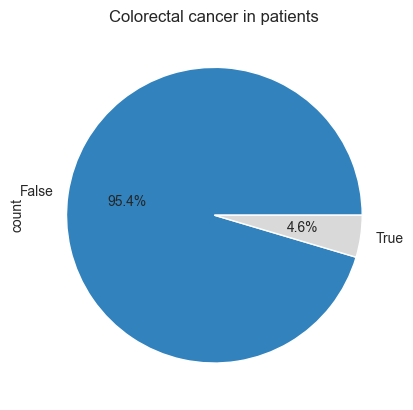

In [101]:

MedicalData2['Colorectalcancer'].value_counts().plot(kind='pie', colormap='tab20c', title='Colorectal cancer in patients', autopct='%1.1f%%')

In [102]:
print(MedicalData2['Aneamia'].value_counts())
MedicalData2['Aneamia'].isna().sum()

Aneamia
False    211
True       7
Name: count, dtype: int64


0

In [103]:
print(MedicalData2['RectalBleeding'].value_counts())
MedicalData2['RectalBleeding'].isna().sum()

RectalBleeding
False    121
True      97
Name: count, dtype: int64


0

In [104]:

print(MedicalData2['Changeofbowelhabit'].value_counts())
MedicalData2['Changeofbowelhabit'].isna().sum()

Changeofbowelhabit
False    144
True      74
Name: count, dtype: int64


0

<h2> 'AbdominalFatness' and 'PhysicalActivity'  <h2>

In [74]:
d = {True: 'True', False : 'False'}
MedicalData2['AbdominalFatness'] = MedicalData2['AbdominalFatness'].map(d)


In [75]:
MedicalData2['AbdominalFatness'].value_counts()

AbdominalFatness
False    217
True       1
Name: count, dtype: int64

In [76]:
MedicalData2['AbdominalFatness'].isna().sum()

0

In [87]:
MedicalData2['PhysicalActivity'].value_counts()

PhysicalActivity
UnKnown                  91
nan                      75
physically active        49
Not physically active     3
Name: count, dtype: int64

In [78]:
MedicalData2['PhysicalActivity'] = MedicalData2['PhysicalActivity'].astype(str)

In [88]:
PhysicalActivity = MedicalData2['PhysicalActivity'].dropna()

In [90]:
d = {'9- UnKnown': 'UnKnown', '1- physically active': 'physically active', '0- Not physically active': 'Not physically active', }
MedicalData2['PhysicalActivity'] = MedicalData2['PhysicalActivity'].map(d)

<Axes: title={'center': 'Abdominal Fatness in Patiences Vs Physical Activity'}, xlabel='PhysicalActivity'>

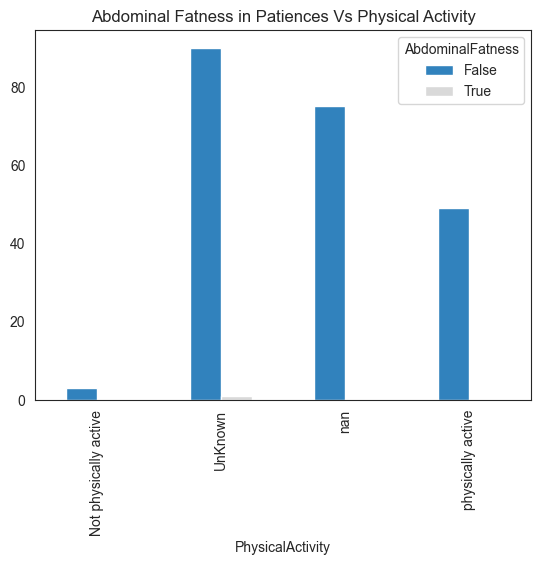

In [97]:
pd.crosstab(MedicalData2['PhysicalActivity'],MedicalData2['AbdominalFatness']).plot.bar(colormap='tab20c', title='Abdominal Fatness in Patiences Vs Physical Activity')

<Axes: title={'center': 'Abdominal Fatness in Patiences Vs Physical Activity'}, xlabel='Physical Activity', ylabel='Abdominal Fatness in Patiences'>

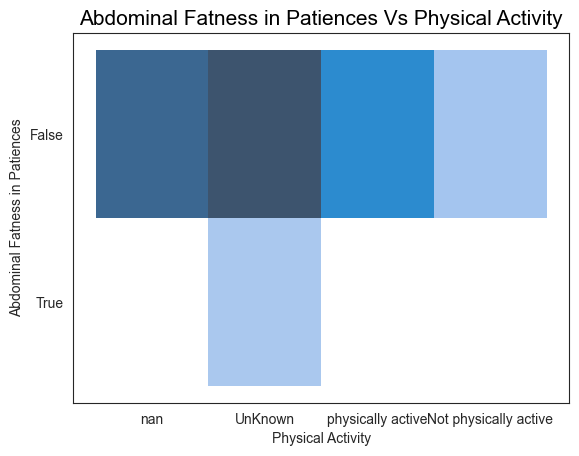

In [96]:
plt.ylabel("Abdominal Fatness in Patiences")
plt.xlabel("Physical Activity")
plt.title('Abdominal Fatness in Patiences Vs Physical Activity', color = 'black',fontsize=15)
sns.set_style('white')

sns.histplot(x=MedicalData2['PhysicalActivity'],y=MedicalData2['AbdominalFatness'], shrink=.8, legend=False)

<h2> Occupation of Male vs Female patiences: <h2>

In [6]:
d = {'9- UnKnown': 'UnKnown', '5- House Wife': 'House Wife', '3- Employee': 'Employee', '4- Retired': 'Retired', '7- Free Work': 'Self Employed', '6- Farmer': 'Farmer' }
MedicalData2['Occupation'] = MedicalData2['Occupation'].map(d)

Number of values in 'Occupation' column is :  145 values
Number of missing values in 'Occupation' column is :  73 values


<Axes: title={'center': 'Occupation of patients'}, xlabel='Occupation'>

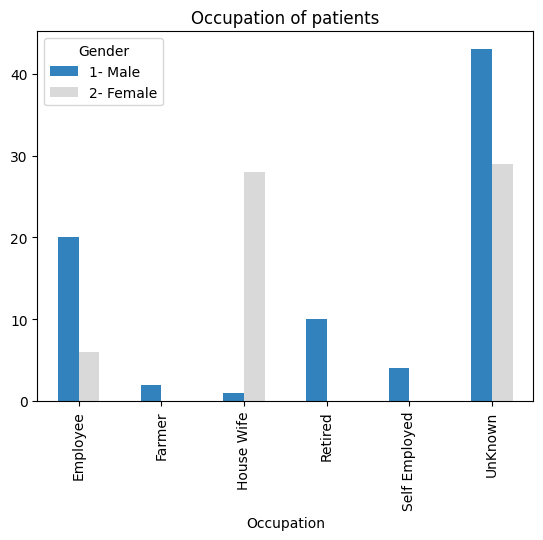

In [7]:
print("Number of values in 'Occupation' column is : ", MedicalData2['Occupation'].value_counts().sum() , "values")
print("Number of missing values in 'Occupation' column is : ", 218 - 145 , "values")
#MedicalData2['Occupation'].value_counts().plot(kind='bar', colormap='tab20c', title='Occupation of patients')
pd.crosstab(MedicalData2['Occupation'].sort_index(),MedicalData2['Gender']).plot.bar(colormap='tab20c', title='Occupation of patients')

<h2> Geographical distribution of patiences: <h2>

Number of values in 'Address' column is :  210 values
Number of missing values in 'Address' column is :  8 values


<Axes: title={'center': 'Address of patients'}, xlabel='Address'>

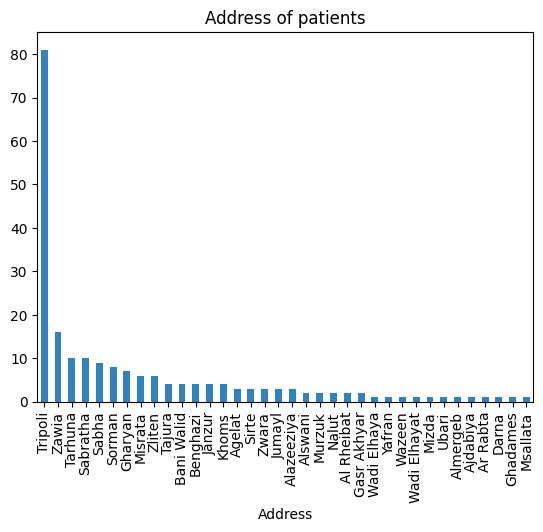

In [8]:
print("Number of values in 'Address' column is : ", MedicalData2['Address'].value_counts().sum() , "values")
print("Number of missing values in 'Address' column is : ", 218 - 210 , "values")
MedicalData2['Address'].value_counts().plot(kind='bar', colormap='tab20c', title='Address of patients')

In [170]:
m = {}
m = MedicalData2['City'].value_counts()
City = pd.DataFrame(m.items(), columns=['City', 'Count'])
City.head()

,City,Count
0,Tajura' wa an Nawahi al Arba,91
1,Az Zawiyah,35
2,Al Marqab,24
3,Mizdah,10
4,Misratah,10


In [172]:
id = {}
id = MedicalData2['Address_id'].value_counts()
Address_id = pd.DataFrame(id.items(), columns=['ID', 'Amount'])
Address_id.head()

,ID,Amount
0,LY-TB,91
1,LY-ZA,35
2,LY-MB,24
3,LY-JG,10
4,LY-MI,10


In [173]:

merged = pd.concat([City, Address_id], axis=1)

In [101]:
city = {'Ghadames':'Ghadamis',	'Al Jufrah':'Al Jufrah', 'Al Kufrah':'Al Kufrah',	
 'Khoms':'Al Marqab', 'Msallata':'Al Marqab', 'Tarhuna':'Al Marqab', 'Almergeb':'Al Marqab', 'Ash Shati':'Ash Shati',
 'Agelat':'An Nuqat al Khams', 'Ajdabiya':'Ajdabiya', 'Zwara':'An Nuqat al Khams', 'Jumayl':'An Nuqat al Khams', 'Al Rheibat':'Mizdah',
  'Wazeen':'Ghadamis', 'Alazeeziya':'Al Jifarah', 'Alswani':"Tajura' wa an Nawahi al Arba", 'Bani Walid':'Misratah', 'Benghazi':'Benghazi', 
  'Darna':'Al Qubbah', 'Gasr Akhyar':'Al Marqab', 'Gharyan':'Mizdah', 'Janzur':"Tajura' wa an Nawahi al Arba", 'Misrata':'Misratah', 'Mizda':'Mizdah',
   'Murzuk':'Murzuq', 'Nalut':'Ghadamis', 'Sabha':'Sabha', 'Sabratha':'Az Zawiyah', 'Sirte':'Surt', 'Sorman':'Az Zawiyah', 'Tajura':"Tajura' wa an Nawahi al Arba",
      'Tripoli':"Tajura' wa an Nawahi al Arba", 'Ubari':'Wadi al Hayaa', 'Wadi Elhaya':'Wadi al Hayaa', 'Wadi Elhayat':'Wadi al Hayaa', 'Yafran':'Az Zawiyah',
      'Zliten':'Al Marqab',  'Zawia':'Az Zawiyah'}

MedicalData2['City'] = MedicalData2['Address'].map(city)
Medical = MedicalData2["City"].dropna()

In [104]:
Libya = json.load(open("Libya3.json", "r"))

# libya
state_id_map = {}
for feature in Libya["features"]:
    feature["id"] = feature["properties"]["shapeISO"]
    state_id_map[feature["properties"]["shapeName"]] = feature["id"]

#Mapping
MedicalData2["Address_id"] = Medical.apply(lambda x: state_id_map[x])

In [186]:
import nbformat
import plotly.graph_objects as go

fig = px.choropleth_mapbox(
    merged,
    locations= "ID",
    geojson=Libya,
    color= "Count",
    hover_name= "City",
    hover_data=["Count"],
    title="Patients Distribution Accross Libya",
    mapbox_style='carto-positron',
    center={"lat": 27, "lon": 15},
    color_continuous_scale= 'Blues',
    zoom=3.4,
    opacity=0.9,)


fig.update_layout(autosize=False,
                  height=600,
                  width=800,
                  margin={"r":0,"t":0,"l":0,"b":0},
                   title="Patients Distribution Accross Libya"
                 )

fig.show()

<h2>2. Dioxin Exposure:<h2>

In [9]:
d = {'9- UnKnown': 'UnKnown', '1- Yes': 'Yes', '0- No': 'No', '2- Quet': 'Quit', }
MedicalData2['DioxinExposure'] = MedicalData2['DioxinExposure'].map(d)

Number of values in 'DioxinExposure' column is :  138 values
Number of missing values in 'DioxinExposure' column is :  80 values


<Axes: title={'center': 'Dioxin exposure in patients'}, ylabel='count'>

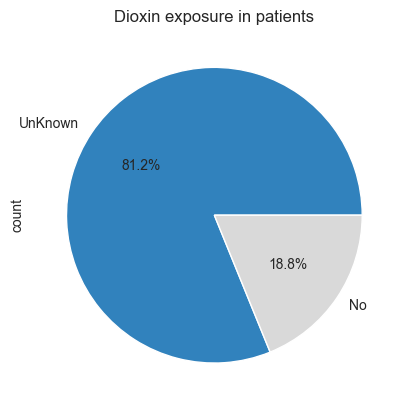

In [45]:

print("Number of values in 'DioxinExposure' column is : ", MedicalData2['DioxinExposure'].value_counts().sum() , "values")
print("Number of missing values in 'DioxinExposure' column is : ", 218 - 138 , "values")
MedicalData2['DioxinExposure'].value_counts().plot(kind='pie', colormap='tab20c', title='Dioxin exposure in patients', autopct='%1.1f%%')

<h2>2. Alcohol Consumption:<h2>

In [11]:
d = {'9- UnKnown': 'UnKnown', '1- Yes': 'Yes', '0- No': 'No', '2- Quet': 'Quit', }
MedicalData2['AlcoholDrinks'] = MedicalData2['AlcoholDrinks'].map(d)

Number of values in 'AlcoholDrinks' column is :  140 values
Number of missing values in 'AlcoholDrinks' column is :  78 values


<Axes: title={'center': 'Alcohol drinking habits in patients'}, ylabel=' '>

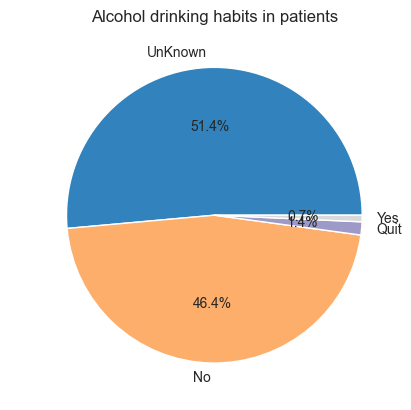

In [44]:

print("Number of values in 'AlcoholDrinks' column is : ", MedicalData2['AlcoholDrinks'].value_counts().sum() , "values")
print("Number of missing values in 'AlcoholDrinks' column is : ", 218 - 140 , "values")

MedicalData2['AlcoholDrinks'].value_counts().plot(kind='pie', colormap='tab20c', 
            title='Alcohol drinking habits in patients', ylabel=' ', autopct='%1.1f%%')


<h2>2. Smoking:<h2>

In [13]:
print("Number of values in 'Smoking' column is : ", MedicalData2['Smoking'].value_counts().sum() , "values")
print("Number of missing values in 'Smoking' column is : ", 218 - 140 , "values")

Number of values in 'Smoking' column is :  140 values
Number of missing values in 'Smoking' column is :  78 values


<h4>2. Only 20 patients are indicated to be smoking patients, this is not accurate given the second largest number of values is "unknown".<h4>

In [14]:
print("Number of values in 'Durationofsmoking' column is : ", MedicalData2['Durationofsmoking'].value_counts().sum() , "values")
print("Number of missing values in 'Durationofsmoking' column is : ", 218 - 13 , "values")

Number of values in 'Durationofsmoking' column is :  13 values
Number of missing values in 'Durationofsmoking' column is :  205 values


In [190]:
d = {'nan': np.nan,'9- UnKnown': 'UnKnown', '1- Yes': 'Smoking', '0- No': 'Not Smoking', '2- Quet': 'Quit Smoking', }
MedicalData2['Smoking.Patients'] = MedicalData2['Smoking'].map(d)
MedicalData2['Smoking.Patients'].value_counts()

Smoking.Patients
Not Smoking     57
UnKnown         53
Smoking         20
Quit Smoking    10
Name: count, dtype: int64

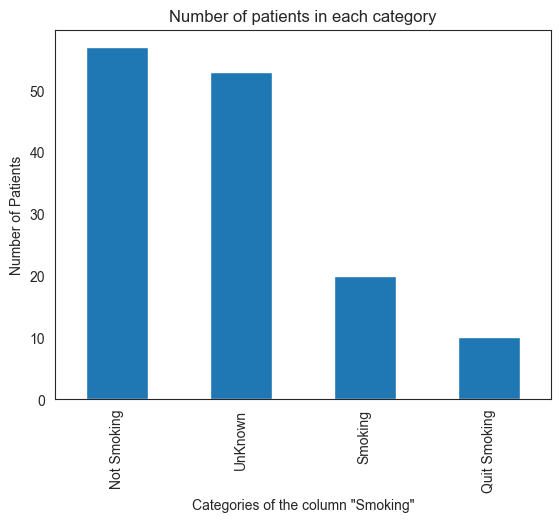

In [192]:
MedicalData2['Smoking.Patients'].value_counts().plot(kind='bar')
plt.title('Number of patients in each category')
plt.xlabel('Categories of the column "Smoking"')
plt.ylabel('Number of Patients')
plt.show()


<h2>2. Age and Smoking:<h2>

In [17]:
print("Number of values in 'age' column is : ", MedicalData2['Age'].value_counts().sum() , "values")
print("Number of missing values in 'age' column is : ", 218 - 209 , "values")

Number of values in 'age' column is :  209 values
Number of missing values in 'age' column is :  9 values


<h4>2.1 The scatter plot shown below indicates that the highest concentration of patients is in the lower left portinn of the graph. Which means patients below 60 years old and have been smoking for less than 25 years, have the highest number of disease.<h4>

<h4>2.2 The age of smoking patients is between 30 and 90 years.<h4>

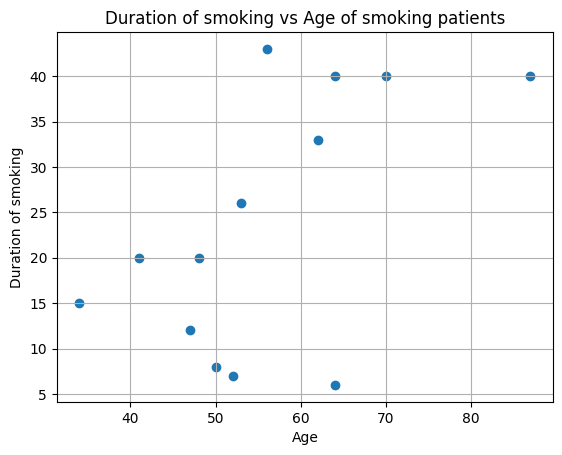

In [18]:

plt.scatter(MedicalData2['Age'], MedicalData2['Durationofsmoking'])
plt.title('Duration of smoking vs Age of smoking patients')
plt.xlabel('Age')
plt.ylabel('Duration of smoking')
plt.grid()
plt.show()

<h2> Age groups <h2>

In [19]:
# Sorting age into age group categories.

bins= [0,27,40,56,71,85, 110]
labels = ['<= 26','27 - 39','40 - 55','56 - 70','71 - 84', '>= 85']
MedicalData2['age group'] = pd.cut(MedicalData2['Age'], bins=bins, labels=labels, right=False)

6


<Axes: xlabel='age group'>

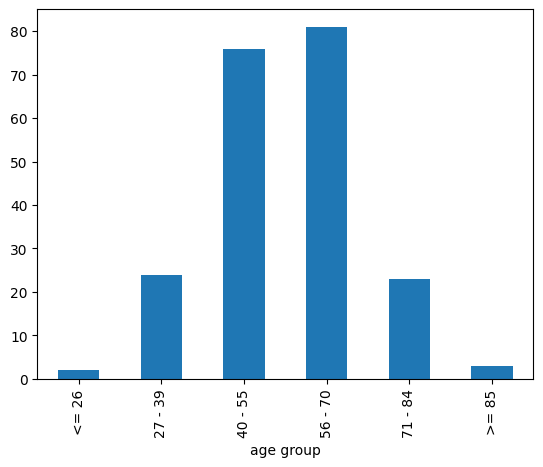

In [20]:
# Plotting the values of each of the six age groups.

print(MedicalData2['age group'].nunique())
MedicalData2['age group'].value_counts().sort_index().plot(kind='bar')

<h2> Gender <h2> 

In [21]:
# Print the amont of male and female.

print(MedicalData2['Gender'].nunique()) # should be 2
MedicalData2['Gender'].value_counts()

2


Gender
1- Male      125
2- Female     86
Name: count, dtype: int64

<Axes: xlabel='Gender'>

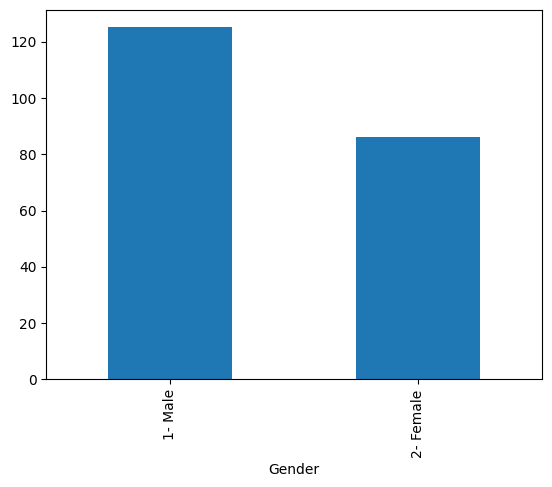

In [22]:
MedicalData2['Gender'].value_counts().sort_index().plot(kind='bar')

<h2> Patients nationality Vs material Status <h2>

In [23]:
Nationality = np.array(MedicalData2['Nationality'], dtype=object)
Gender = np.array(MedicalData2['Gender'], dtype=object)
MaritalStatus = np.array(MedicalData2['MaritalStatus'], dtype=object)

pd.crosstab(Nationality,[Gender, MaritalStatus], rownames=['Nationality'], colnames=['Gender', 'MaritalStatus'])

Gender             1- Male                          2- Female             \
MaritalStatus 1- Unmarried 2- Married 9- UnKnown 1- Unmarried 2- Married   
Nationality                                                                
1- Libyan                2         34         44            4         30   
2- Non-Libyan            0          0          0            0          0   
9- UnKnown               0          0          1            0          1   

Gender                                           
MaritalStatus 3- Widowed 4- Divorced 9- UnKnown  
Nationality                                      
1- Libyan              1           2         22  
2- Non-Libyan          0           0          1  
9- UnKnown             0           0          2

<Axes: title={'center': 'Patients nationality Vs material Status'}, xlabel='Material Status', ylabel='Nationality'>

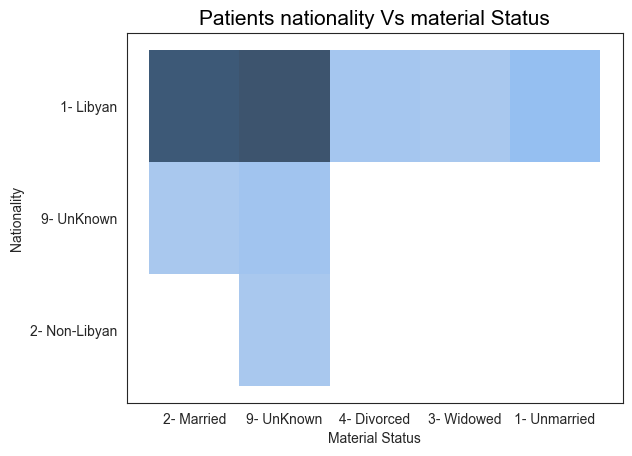

In [197]:
plt.ylabel("Nationality")
plt.xlabel("Material Status")
plt.title('Patients nationality Vs material Status', color = 'black',fontsize=15)
sns.set_style('white')

sns.histplot(x=MaritalStatus,y=Nationality, shrink=.8, legend=False)


<h2> Marital Status vs family history <h2>

In [13]:
MedicalData2['native.country'] = [i if i == '1- Libyan' else 'others' for i in MedicalData2['Nationality']  ]

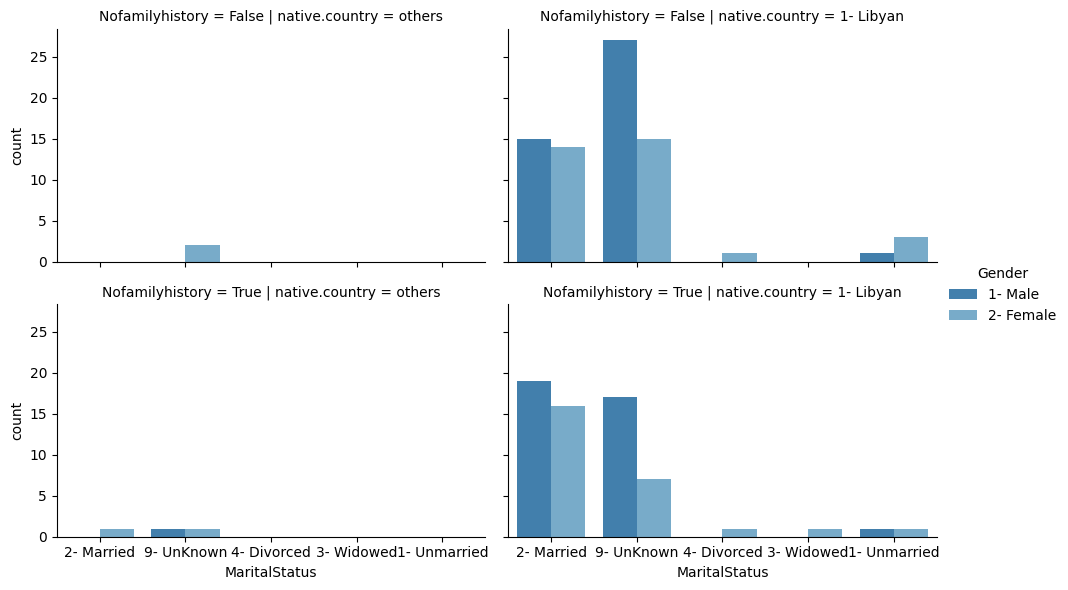

In [14]:
sns.catplot(hue='Gender',x='MaritalStatus', palette='tab20c',data=MedicalData2,
            col='native.country',
            row='Nofamilyhistory',kind='count',height=3,aspect=1.6)

<h2>Nationality vs Marital Status <h2> 

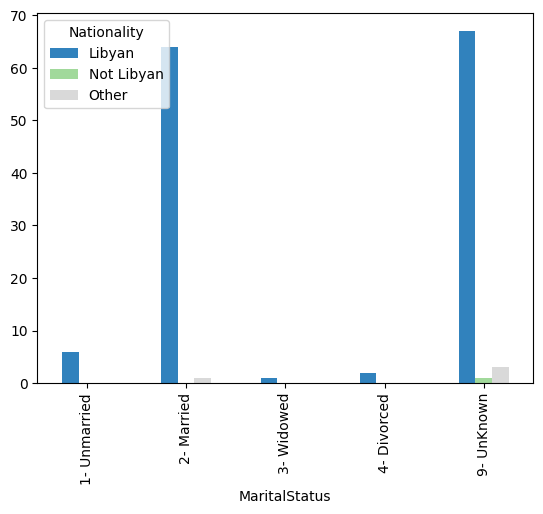

In [11]:
pd.crosstab(MedicalData2['MaritalStatus'],MedicalData2['Nationality']).plot.bar( colormap='tab20c')
plt.legend(title='Nationality', loc='upper left', labels=['Libyan', 'Not Libyan', 'Other'])

<h2> Gender vs  Marital Status <h2>

<Axes: xlabel='MaritalStatus'>

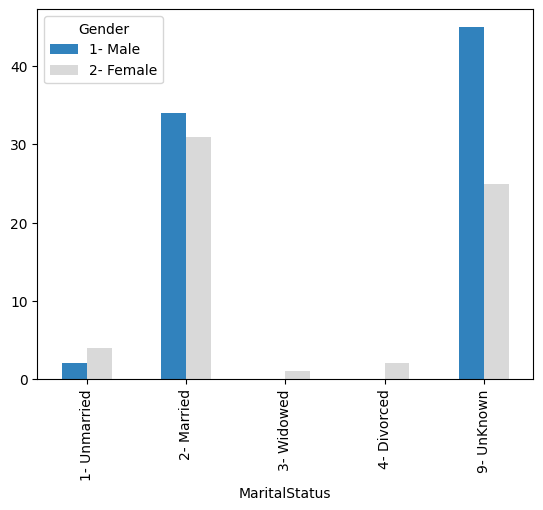

In [10]:
pd.crosstab(MedicalData2['MaritalStatus'].sort_index(),MedicalData2['Gender']).plot.bar( colormap='tab20c')

In [30]:
# Print the different nationalites of the collected data

print("There are ", MedicalData2['Nationality'].nunique(), "unique nationalities. ") # should be 2
MedicalData2['Nationality'].value_counts()


There are  3 unique nationalities. 


Nationality
1- Libyan        205
9- UnKnown         4
2- Non-Libyan      2
Name: count, dtype: int64

<h2> Gender vs  Age Group <h2>

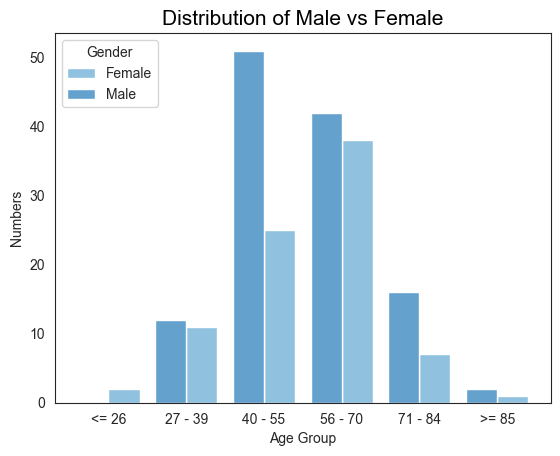

In [31]:
plt.ylabel("Numbers")
plt.xlabel("Age Group")
plt.title('Distribution of Male vs Female', color = 'black',fontsize=15)
sns.set_style('white')

sns.histplot(data=MedicalData2, x="age group", hue="Gender", multiple="dodge", palette="tab20c", shrink=.8, legend=False)

plt.legend(title='Gender', loc='upper left', labels=['Female', 'Male'])